In [1]:
import lumberjack
import tree_braider5 as trbr
import tree_reader as tr
import numpy as np

In [2]:
forest = tr.Forest.reconstitute('../forest_johnston_ihmm')

In [3]:
len(forest.roots() + forest.stems())

5769

In [ ]:
braid = trbr.IHMM(forest,inf_check=True,start_states=10)

In [5]:
local_gains = forest.local_gain_matrix(forest.roots() + forest.stems())
# local_gains = forest.local_gain_matrix(forest.nodes())
node_levels = [n.level for n in (forest.roots() + forest.stems())]

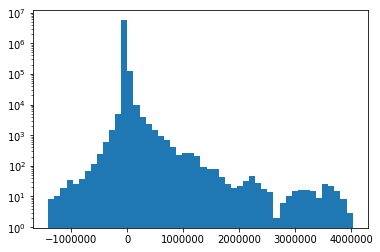

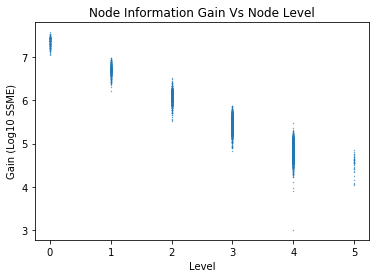

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(local_gains.flatten(),log=True,bins=50)
plt.show()

node_gains = np.log10(np.sum(local_gains,axis=0))

plt.figure()
plt.title("Node Information Gain Vs Node Level")
plt.scatter(node_levels,node_gains,s=.1)
plt.xlabel("Level")
plt.ylabel("Gain (Log10 SSME)")
plt.show()

In [7]:
braid.state_covariances[1]

array([[ 1.07267249e+00, -2.56676255e-05,  0.00000000e+00, ...,
        -1.09916270e-03,  0.00000000e+00,  0.00000000e+00],
       [-2.56676255e-05,  2.85394666e+00,  0.00000000e+00, ...,
         8.65088689e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.09916270e-03,  8.65088689e-02,  0.00000000e+00, ...,
         1.80203701e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

1000

In [11]:
# braid.establish_parameters()

In [ ]:
braid.sweep()

In [13]:
np.any(np.isnan(braid.state_log_dets))

False

In [14]:
np.any(np.isinf(braid.state_covariances))

False

In [15]:
braid.state_precisions[1]

array([[ 0.8501545 ,  0.00260879,  0.        , ...,  0.00226136,
         0.        ,  0.        ],
       [ 0.00260879,  0.32832593,  0.        , ..., -0.0079392 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.89621525, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00226136, -0.0079392 ,  0.        , ...,  0.47152389,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.89621525,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.89621525]])

In [16]:
braid.background_covariance_prior

array([[ 1.26811459e+00, -6.41493878e-06,  0.00000000e+00, ...,
        -2.74737429e-04,  0.00000000e+00,  0.00000000e+00],
       [-6.41493878e-06,  2.49595647e+00,  0.00000000e+00, ...,
         4.84550246e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.24995001e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.74737429e-04,  4.84550246e-02,  0.00000000e+00, ...,
         2.01164011e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.24995001e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.24995001e+00]])

In [17]:
print(braid.state_precisions[1][:10])
print(braid.background_precision_prior[:10])
print(braid.background_log_det)
print(braid.state_log_dets)

[[ 8.50154501e-01  2.60878676e-03  0.00000000e+00 ...  2.26135866e-03
   0.00000000e+00  0.00000000e+00]
 [ 2.60878676e-03  3.28325933e-01  0.00000000e+00 ... -7.93919947e-03
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.96215247e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.24679721e-04 -1.56598534e-03  0.00000000e+00 ...  1.28182952e-04
   0.00000000e+00  0.00000000e+00]
 [-4.10532353e-04  1.27908862e-03  0.00000000e+00 ...  7.60298749e-04
   0.00000000e+00  0.00000000e+00]]
[[ 7.89505197e-01  6.01788386e-04  0.00000000e+00 ...  4.69299161e-04
   0.00000000e+00  0.00000000e+00]
 [ 6.01788386e-04  4.19592668e-01  0.00000000e+00 ... -5.05850909e-03
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.00031995e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.0000000

In [18]:
# np.mean(forest.output,axis=1)

In [19]:
# np.sum(forest.output,axis=1)

In [20]:
node_medians = forest.raw_prediction_matrix(forest.nodes())
node_medians.shape

(11738, 1000)

In [21]:
np.sum(node_medians[braid.live_mask],axis=0)

array([5.27747095e-01, 4.07805450e+01, 0.00000000e+00, 5.52444076e+01,
       4.07407984e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.97865101e+00, 7.79873610e-01, 0.00000000e+00, 9.62487210e+02,
       6.16354019e+02, 0.00000000e+00, 0.00000000e+00, 3.66858118e+02,
       3.49253880e+03, 2.32161013e+03, 1.12502111e+03, 1.44889770e+00,
       1.79316977e+00, 1.16593504e+00, 0.00000000e+00, 0.00000000e+00,
       9.98599987e+00, 4.45744015e-01, 2.81626640e+01, 0.00000000e+00,
       0.00000000e+00, 1.03563008e+02, 0.00000000e+00, 0.00000000e+00,
       5.18346164e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.12129815e+02, 6.74052346e-01, 1.31407172e+00,
       3.52416933e-01, 0.00000000e+00, 7.91922651e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.65532244e+01, 9.23017858e+01,
       2.41916376e+00, 4.84608275e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.42566139e-02, 8.02518039e+02, 0.00000000e+00,
      

In [22]:
print(np.any(np.isinf(braid.state_covariances[1])))

False


In [23]:
braid.data_precision

array([[ 9.99832193e-01,  1.63196849e-04,  0.00000000e+00, ...,
         1.40048133e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.63196849e-04,  9.89069337e-01,  0.00000000e+00, ...,
        -2.11654813e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.40048133e-04, -2.11654813e-03,  0.00000000e+00, ...,
         9.92477965e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [24]:
braid.beta

1

In [25]:
np.exp2([1,2,3,4])

array([ 2.,  4.,  8., 16.])

In [26]:
np.log2(24/4)

2.584962500721156

In [27]:
import random

In [28]:
    def log_sampling(sequence):
        sort = np.argsort(sequence)[::-1]
        sorted_log = sequence[sort]
        sorted_log -= sorted_log[0]
        raw_odds = np.exp2(sorted_log)

        draw = random.random()*np.sum(raw_odds)

        for i,w in zip(sort,raw_odds):
            draw -= w
            if draw <= 0 or (not np.isfinite(draw)):
                return i

        return len(raw_odds) - 1

In [29]:
for i in range(100):
    print(log_sampling(np.array([1,2,3,4])))

3
3
3
2
2
3
2
2
0
2
2
3
0
3
1
3
2
3
3
1
3
3
3
2
1
0
3
3
3
1
3
3
2
3
3
3
0
3
2
2
0
2
0
0
1
3
3
3
2
3
2
2
2
0
3
1
3
3
3
2
3
3
1
2
1
2
3
2
3
0
3
3
3
3
2
3
1
3
2
0
3
3
1
3
3
3
2
3
3
3
3
3
3
2
0
2
1
2
3
2
